# Problem 3

In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 3B

In [2]:
G = nx.Graph()

G.add_edge("Medici", "Salviati")
G.add_edge("Medici", "Barbadori")
G.add_edge("Medici", "Albizzi")
G.add_edge("Medici", "Tornabuoni")
G.add_edge("Medici", "Ridolfi")
G.add_edge("Medici", "Acciaiuoli")

G.add_edge("Albizzi", "Ginori")
G.add_edge("Salviati", "Pazzi")

G.add_edge("Albizzi", "Guadagni")
G.add_edge("Tornabuoni", "Guadagni")
G.add_edge("Guadagni", "Lamberteschi")

G.add_edge("Strozzi","Ridolfi")
G.add_edge("Strozzi","Castellani")
G.add_edge("Strozzi","Peruzzi")
G.add_edge("Strozzi","Bischeri")

G.add_edge("Castellani", "Barbadori")
G.add_edge("Castellani", "Peruzzi")
G.add_edge("Peruzzi", "Bischeri")
G.add_edge("Bischeri", "Guadagni")

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")

Number of nodes: 15
Number of edges: 19


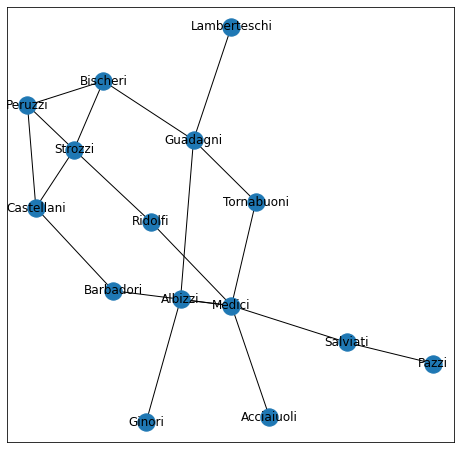

In [4]:
fig = plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.savefig("marriage_relationships_florence.png")

In [5]:
# Construct a dictionary that maps the label of nodes  
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i
print(indices)

{'Medici': 0, 'Salviati': 1, 'Barbadori': 2, 'Albizzi': 3, 'Tornabuoni': 4, 'Ridolfi': 5, 'Acciaiuoli': 6, 'Ginori': 7, 'Pazzi': 8, 'Guadagni': 9, 'Lamberteschi': 10, 'Strozzi': 11, 'Castellani': 12, 'Peruzzi': 13, 'Bischeri': 14}


In [10]:
# Number of iterations
n_iter = 50

# Stubborn and regular nodes
stubborn = ["Medici", "Strozzi"]
# Get the ids of the stubborn nodes
stubborn_id = [indices.get(key) for key in stubborn]
regular = [node for node in G.nodes if node not in stubborn]
# Get the ids of the regular nodes
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
print("Stubborn nodes:", stubborn)
print("Regular nodes:", regular)

# Input to stubborn nodes, 1 for Medici and -1 for Strozzi
u = [1, -1]

# P matrix
W = nx.adjacency_matrix(G)
# convert W to a numpy array
W = W.toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Submatrices of P
Q = P[np.ix_(regular_id, regular_id)] #links from regular to regular nodes
E = P[np.ix_(regular_id, stubborn_id)] #links from regular to stubborn nodes

# Sample a random initial condition for regular nodes
# the result is independent from the initial condition
ic = np.random.uniform(0, 1, len(regular))

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u
x[regular_id,0] = ic
print("Initial condition:", x[:,0])

# Evolve the opinion vector
for t in range(1, n_iter):
    # Use the previously computed submatrices Q and E of P
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1]

# Get the result in the last iteration
x_final = x[:,n_iter-1]

for key in indices.keys():
    print(key, x_final[indices[key]])



Stubborn nodes: ['Medici', 'Strozzi']
Regular nodes: ['Salviati', 'Barbadori', 'Albizzi', 'Tornabuoni', 'Ridolfi', 'Acciaiuoli', 'Ginori', 'Pazzi', 'Guadagni', 'Lamberteschi', 'Castellani', 'Peruzzi', 'Bischeri']
Initial condition: [ 1.          0.61536415  0.65033435  0.52882991  0.30529347  0.0097337
  0.24943837  0.55520822  0.22656962  0.95260436  0.01712419 -1.
  0.90080699  0.64001879  0.44382028]
Medici 1.0
Salviati 0.9999999769499784
Barbadori 0.27272782588334105
Albizzi 0.636380687519936
Tornabuoni 0.6363761442301243
Ridolfi 0.0
Acciaiuoli 1.0
Ginori 0.6363695785837937
Pazzi 0.9999999770739167
Guadagni 0.2727329598698921
Lamberteschi 0.2727522884602487
Strozzi -1.0
Castellani -0.4545422800028052
Peruzzi -0.6363620243899095
Bischeri -0.4545347524689469


#### From the followig plot it is possible to notice that the final opinion for the regular nodes is reached approximately after 20 iterations, regardless of their initial opinion. From these trajectories, we can also see how the stubborn nodes influence the other families. 

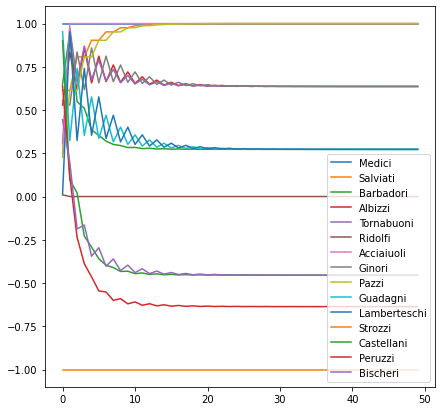

In [11]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    # trajectory is each row of x (observe node at each time istance)
    trajectory = x[node,:]
    # Diplaying with family name
    ax.plot(trajectory, label=list(G.nodes())[node])
    
ax.legend()

## Problem 3D

In [12]:
max_iter = 100
n_nodes = G.number_of_nodes()
# Initialization
y_ = np.zeros((n_nodes, max_iter))
# uniform between -1 and 1
y_[:,0] = np.random.uniform(-1, 1, n_nodes)
#print(y_)

# Distributed computation of the Page-Rank centrality:
# y(t+1) = Q'y(t) + lambda
# with Q = (1-beta)*P
# with lambda = beta*ni

beta = 0.15
# ni nonnegative vector
ni = np.ones(n_nodes)
#print(ni/sum(ni))

Q = (1-beta) * P
QT = Q.T
# Normalized
lambda_ = beta * ni/sum(ni)

for t in range(1, max_iter):
  y_[:, t] = QT @y_[:, t-1] + lambda_



In [13]:
# store centralities in order to plot them
centralities={}
# The keys are the families
for key in indices.keys():
    # take last column of y_ 
    centralities[key]=y_[indices[key], -1] #I retrieve the correspondent centrality
centralities

{'Acciaiuoli': 0.03182392860577424,
 'Albizzi': 0.08212627262775575,
 'Barbadori': 0.05212696421140269,
 'Bischeri': 0.07152741292576482,
 'Castellani': 0.07165777269557103,
 'Ginori': 0.03326911056168821,
 'Guadagni': 0.10364047053489686,
 'Lamberteschi': 0.03202360001435009,
 'Medici': 0.15405126055760054,
 'Pazzi': 0.03683001119822745,
 'Peruzzi': 0.07018671337920146,
 'Ridolfi': 0.051441506052920645,
 'Salviati': 0.06312943815686516,
 'Strozzi': 0.09231801146152196,
 'Tornabuoni': 0.053847528620124326}

#### In this figure the colour and the size of the nodes are proportional to the Pagerank centrality. Medici has the highest centrality.

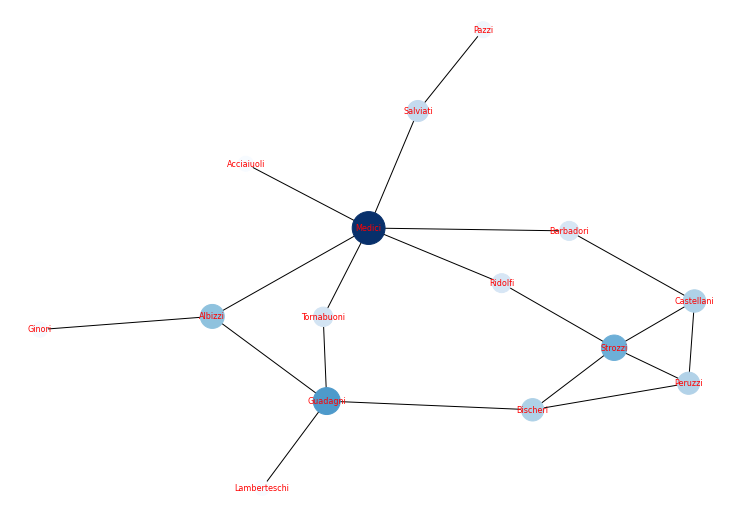

In [14]:
plt.figure(1, figsize=(10,7))
pos = nx.spring_layout(G)
nx.draw(G, pos,
          with_labels=True,
          nodelist=centralities.keys(),
          # node size is proportional to pagerank centrality
          node_size = [d*7000 for d in centralities.values()],  
          node_color=list(centralities.values()),
          font_size=8,
          font_color = 'red',
          cmap=plt.cm.Blues,
          )